In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
data
transactions = []
for i in range (0,2000):
    transactions.append([str(data.values[i,u]) for u in range(1,10)])

In [6]:
book_series = pd.DataFrame(pd.Series(transactions))
book_series
book_series.columns = ['book types']
book_series

,book types
0,"[1, 0, 1, 0, 0, 1, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[1, 1, 0, 1, 0, 1, 0, 0, 0]"
4,"[0, 1, 0, 0, 0, 1, 0, 0, 0]"
...,...
1995,"[0, 1, 0, 0, 1, 1, 1, 0, 1]"
1996,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1998,"[0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [7]:
X = book_series['book types'].str.join(sep=',').str.get_dummies(sep=',')
X

,0,1
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
1995,1,1
1996,1,0
1997,1,0
1998,1,1


(array([[0., 0., 0., ..., 0., 0., 2.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 2.],
        [1., 0., 0., ..., 0., 0., 1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2000 Lists of Patches objects>)

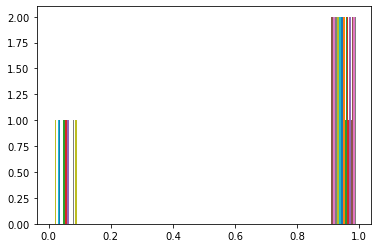

In [11]:
plt.hist(X)

# Apriori 

In [8]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(X,min_support= 0.005,max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.9975,(0)
1,0.6870,(1)
2,0.6845,"(1, 0)"


In [9]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of    support itemsets
0   0.9975      (0)
1   0.6870      (1)
2   0.6845   (1, 0)>

In [58]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head(20)
rules.sort_values("lift",ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(soda),(rolls/buns),0.068141,0.069615,0.006552,0.096154,1.381222,0.001808,1.029362
1,(rolls/buns),(soda),0.069615,0.068141,0.006552,0.094118,1.381222,0.001808,1.028676


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

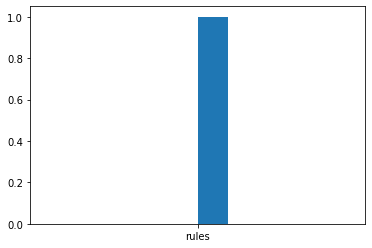

In [10]:
plt.hist('rules')